<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [2]:
df=pd.read_csv("financial_assets_prices.csv")
df.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [3]:
df.isna().count()

date      783
Asset1    783
Asset2    783
Asset3    783
Asset4    783
Asset5    783
dtype: int64

In [4]:
df.Asset1=df.Asset1.fillna(method="ffill")
df.Asset2=df.Asset2.fillna(method="ffill")
df.Asset3=df.Asset3.fillna(method="ffill")
df.Asset4=df.Asset4.fillna(method="ffill")
df.Asset5=df.Asset5.fillna(method="ffill")

/tmp/ipykernel_115326/3340560278.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Asset1=df.Asset1.fillna(method="ffill")
/tmp/ipykernel_115326/3340560278.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Asset2=df.Asset2.fillna(method="ffill")
/tmp/ipykernel_115326/3340560278.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Asset3=df.Asset3.fillna(method="ffill")
/tmp/ipykernel_115326/3340560278.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Asset4=df.Asset4.fillna(method="ffill")
/tmp/ipykernel_115326/3340560278.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. 

In [5]:
df.isna().count()

date      783
Asset1    783
Asset2    783
Asset3    783
Asset4    783
Asset5    783
dtype: int64

In [6]:
df.date=pd.to_datetime(df.date)

In [7]:
df_plot_normal=df.set_index("date")

En la celda de arriba convertimos la columna "date" en index para la gráfica temporal. Necesitamos hacer eso para que al dividir por el .iloc[0] y normalizar los precios de los activos, no entre en conflicto al tener que dividir la fecha entre un número determinado. 

In [8]:
# Normalizamos los precios para que comiencen en el mismo valor.

In [9]:
df_plot_normal=df_plot_normal/df_plot_normal.iloc[0]

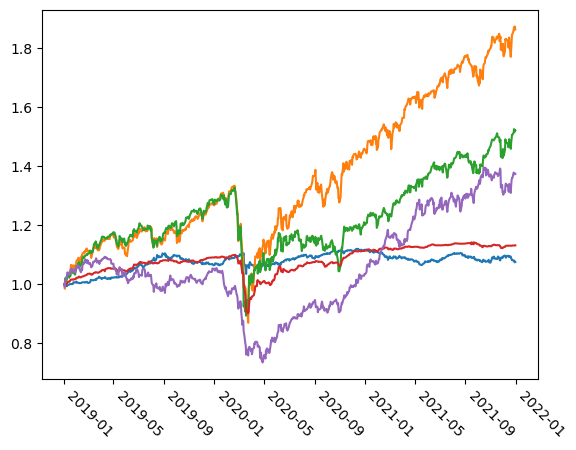

In [10]:
## Graficamos
for col in ["Asset1","Asset2","Asset3","Asset4","Asset5"]:
    plt.xticks(rotation=-45,ha="left")
    plt.plot(df_plot_normal.index, df_plot_normal[col])

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [11]:
df_pct=df.copy()
df_pct["Asset1pct"]=df_pct.Asset1.pct_change()
df_pct["Asset2pct"]=df_pct.Asset2.pct_change()
df_pct["Asset3pct"]=df_pct.Asset3.pct_change()
df_pct["Asset4pct"]=df_pct.Asset4.pct_change()
df_pct["Asset5pct"]=df_pct.Asset5.pct_change()

In [12]:
df_pct=df_pct.drop(columns=["Asset1","Asset2","Asset3","Asset4","Asset5"])

In [13]:
df_pct.head()

,date,Asset1pct,Asset2pct,Asset3pct,Asset4pct,Asset5pct
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [14]:
stock_performance_df=df_pct[["Asset1pct","Asset2pct","Asset3pct","Asset4pct","Asset5pct"]]
stock_performance_df.head()

,Asset1pct,Asset2pct,Asset3pct,Asset4pct,Asset5pct
0,NaN,NaN,NaN,NaN,NaN
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,-0.001535,0.001003,0.007040,0.003605,-0.000192


In [15]:
correlation_matrix=stock_performance_df.corr()
correlation_matrix

,Asset1pct,Asset2pct,Asset3pct,Asset4pct,Asset5pct
Asset1pct,1.000000,-0.088341,-0.061253,0.102252,-0.106484
Asset2pct,-0.088341,1.000000,0.852491,0.526634,0.591399
Asset3pct,-0.061253,0.852491,1.000000,0.511550,0.557414
Asset4pct,0.102252,0.526634,0.511550,1.000000,0.421155
Asset5pct,-0.106484,0.591399,0.557414,0.421155,1.000000


<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<Axes: xlabel='Asset2pct', ylabel='Asset3pct'>

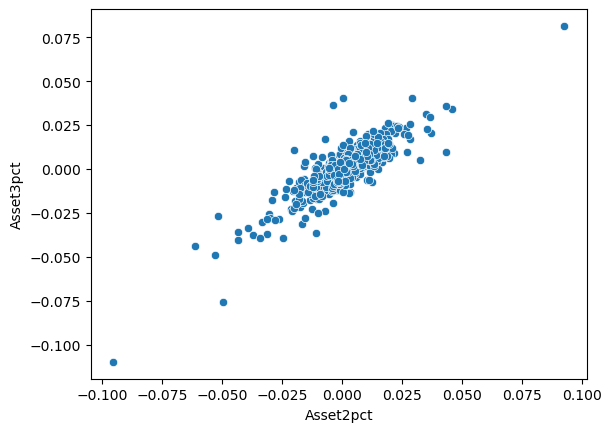

In [16]:
sns.scatterplot(data=stock_performance_df, x="Asset2pct", y="Asset3pct")

<Axes: xlabel='Asset5pct', ylabel='Asset4pct'>

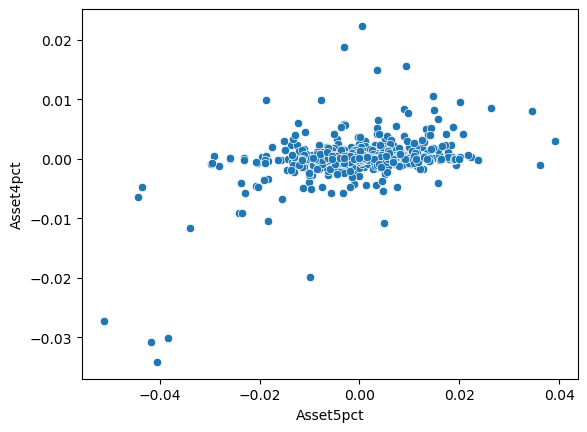

In [17]:
sns.scatterplot(data=stock_performance_df, x="Asset5pct", y="Asset4pct")

Between Asset 2 and Asset 3, we observe a positive correlation, where both tend to have positive or negative returns in tandem.

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [18]:
df_weights=pd.read_csv("portfolio_weights.csv")
df_weights.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [19]:
df_weights["date"] = pd.to_datetime(df_weights["date"])
assets=["Asset1","Asset2","Asset3","Asset4","Asset5"]

In [20]:
df_weights.set_index("date", inplace=True)

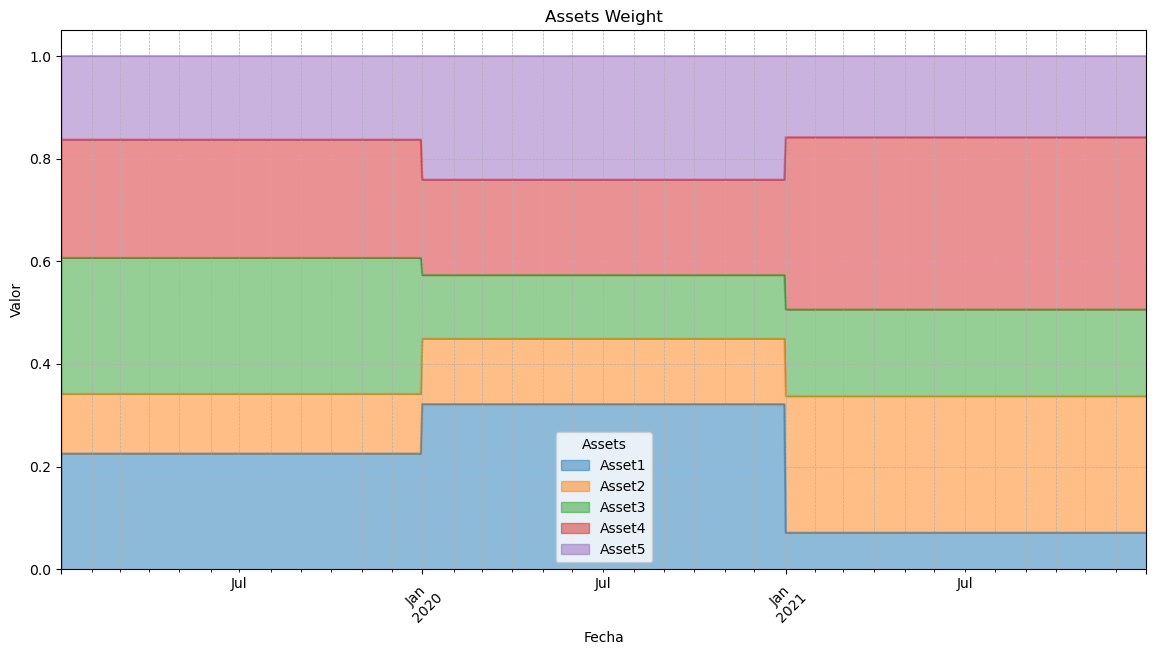

In [21]:
# Graficamos usando plot.area() para los activos seleccionados
df_weights[assets].plot.area(figsize=(14, 7), alpha=0.5)

# Personalizamos el gráfico
plt.title("Assets Weight")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar el gráfico con las fechas en el eje x
plt.xticks(rotation=45)  # Rotar las fechas para que se vean mejor
plt.legend(title="Assets")
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

1. Calcular la rentabilidad de cada día.
2. Calcular la rentabilidad acumulada: Acumula la rentabilidad diaria multiplicativamente para obtener la rentabilidad total hasta cada día.
3. Graficar la rentabilidad acumulada: Finalmente, grafica la rentabilidad acumulada a lo largo del tiempo.

Suma 1 a cada rendimiento diario para obtener los factores de crecimiento diarios: 

- 1 + rendimiento diario

Acumula el producto de estos factores de crecimiento desde el inicio hasta cada día, usando .cumprod() para calcular la rentabilidad acumulada.

Resta 1 al final para que el valor acumulado esté en términos de rentabilidad acumulada y no en términos del índice de crecimiento.

EXPLICACIÓN:

Al tener un CSV con los pesos de cada activo, lo interesante es calcular la rentabilidad histórica acumulada de una cartera de activos.

Los pesos te indican la proporción de cada activo dentro del portafolio y, por lo tanto, son esenciales para calcular la rentabilidad acumulada del portafolio completo.

Para ello:

1. Multiplica los rendimientos diarios de cada activo por su peso correspondiente para ponderar cada rendimiento diario según la proporción de cada activo en la cartera.

2. Suma los rendimientos ponderados de todos los activos para cada día para obtener el rendimiento diario de la cartera.

3. Calcula la rentabilidad acumulada del portafolio para calcular la rentabilidad acumulada.

Volvemos a df para graficar sobre el precio de los assets.

In [22]:
df_pct.head()

,date,Asset1pct,Asset2pct,Asset3pct,Asset4pct,Asset5pct
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192


In [23]:
df_weights.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [24]:
# Multiplicamos los rendimientos diarios de cada activo por los pesos del portafolio. 
# Obtenemos un DataFrame donde cada valor corresponde a la contribución ponderada de cada activo en el rendimiento del portafolio.
weighted_returns = df_pct[['Asset1pct', 'Asset2pct', 'Asset3pct', 'Asset4pct', 'Asset5pct']] * df_weights.values
# Weighted returns= rendimientos ponderados

# Suma los rendimientos ponderados de cada activo para obtener el rendimiento diario del portafolio. 
# El parámetro axis=1 indica que la suma se hace a lo largo de las columnas (es decir, por cada fila).
daily_return_portfolio = weighted_returns.sum(axis=1)

# Calcula la rentabilidad acumulada del portafolio
portfolio_cumulative_return = (1 + daily_return_portfolio).cumprod() - 1
portfolio_cumulative_return

0      0.000000
1     -0.005997
2      0.005322
3      0.007354
4      0.009807
         ...   
778    0.384885
779    0.388438
780    0.385203
781    0.387423
782    0.385714
Length: 783, dtype: float64

In [25]:
# Obtenemos una columna, que corresponde a la rentabilidad acumulada del portafolio.
# Necesitamos calcular la rentabilidad acumulada para cada activo individualmente 
# Una columna de rentabilidad acumulada para cada activo
# Por lo que calculamos la rentabilidad acumulada para cada activo de manera independiente. 

# Calcular la rentabilidad acumulada para cada activo
assets_cumulative_return = (1 + df_pct[['Asset1pct', 'Asset2pct', 'Asset3pct', 'Asset4pct', 'Asset5pct']]).cumprod() - 1
assets_cumulative_return

,Asset1pct,Asset2pct,Asset3pct,Asset4pct,Asset5pct
0,NaN,NaN,NaN,NaN,NaN
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.004767,0.004546,0.019412,-0.003829,0.009629
3,-0.006271,0.017235,0.011932,-0.001981,0.024563
4,-0.007796,0.018255,0.019056,0.001618,0.024366
...,...,...,...,...,...
778,0.079543,0.860510,0.513496,0.130294,0.377677
779,0.079612,0.870711,0.524997,0.130294,0.376105
780,0.074363,0.867740,0.514861,0.130492,0.371782
781,0.073615,0.873163,0.519929,0.130789,0.373747


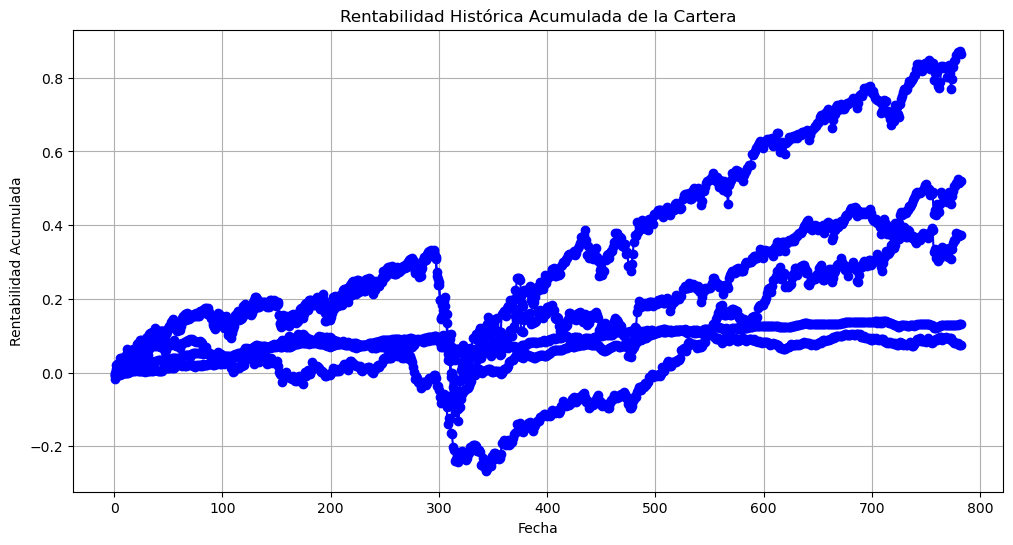

In [26]:
# 3. Graficar la rentabilidad acumulada POR ACTIVOS
plt.figure(figsize=(12, 6))
plt.plot(assets_cumulative_return, marker='o', linestyle='-', color='b')
plt.title('Rentabilidad Histórica Acumulada de la Cartera')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.grid(True)
plt.show()

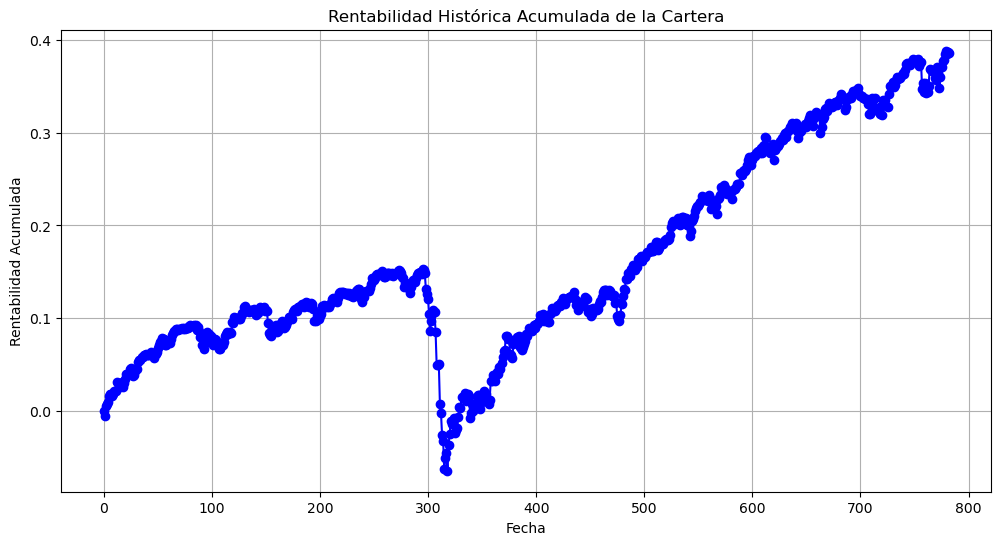

In [27]:
# 3. Graficar la rentabilidad acumulada POR CARTERA
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_return, marker='o', linestyle='-', color='b')
plt.title('Rentabilidad Histórica Acumulada de la Cartera')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [28]:
# Calcular la rentabilidad total acumulada (producto acumulado) del portafolio
total_return = (1 + daily_return_portfolio).prod() - 1

# Calcular el número de días en el periodo (usando el índice del DataFrame)
n_days = len(daily_return_portfolio)

# Rentabilidad anualizada usando el rendimiento total acumulado
annualized_return = (1 + total_return) ** (252 / n_days) - 1  # 252 días en un año laboral

print(f"Rentabilidad anualizada: {annualized_return * 100:.2f}%")

Rentabilidad anualizada: 11.07%


<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [29]:
daily_volatility=daily_return_portfolio.std()
daily_volatility

0.005265848075609364

In [30]:
annualized_volatility=daily_volatility*np.sqrt(261)
annualized_volatility

0.08507237920946549

In [31]:
print(f"La volatilidad anualizada es de {annualized_volatility:.2f}")

La volatilidad anualizada es de 0.09


<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [32]:
df_family=pd.read_csv("financial_assets_information.csv")
df_family

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


Viendo los gráficos por familia, sabemos que los porcentajes de los activos 1 y 2 deberán agruparse (sumarse), al igual que el de los activos 3 y 4.

In [33]:
df_weights

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356


In [34]:
# Pasamos el dataframe "family" a diccionario.
# Lo usaremos para agrupar a los activos de df_weight por familia.
family_dict = df_family.set_index("Name")["Family"].to_dict()

# Agrupamos las columnas de df_weights según el diccionario de familias
df_weights_grouped = pd.DataFrame()

# Para cada familia, sumamos los activos correspondientes
for family in df_family["Family"].unique():
    # Obtenemos los activos que pertenecen a esta familia
    assets_in_family = [asset for asset, fam in family_dict.items() if fam == family]
    
    # Sumamos los valores de los activos de esta familia
    df_weights_grouped[family] = df_weights[assets_in_family].sum(axis=1)

# Ahora df_weights_grouped tiene los pesos agrupados por familia
df_weights_grouped

,Fixed Income,Equity,Alternative
date,,,
2019-01-02,0.341713,0.495313,0.162974
2019-01-03,0.341713,0.495313,0.162974
2019-01-04,0.341713,0.495313,0.162974
2019-01-07,0.341713,0.495313,0.162974
2019-01-08,0.341713,0.495313,0.162974
...,...,...,...
2021-12-27,0.337400,0.504245,0.158356
2021-12-28,0.337400,0.504245,0.158356
2021-12-29,0.337400,0.504245,0.158356


In [35]:
family=["Fixed Income","Equity","Alternative"]

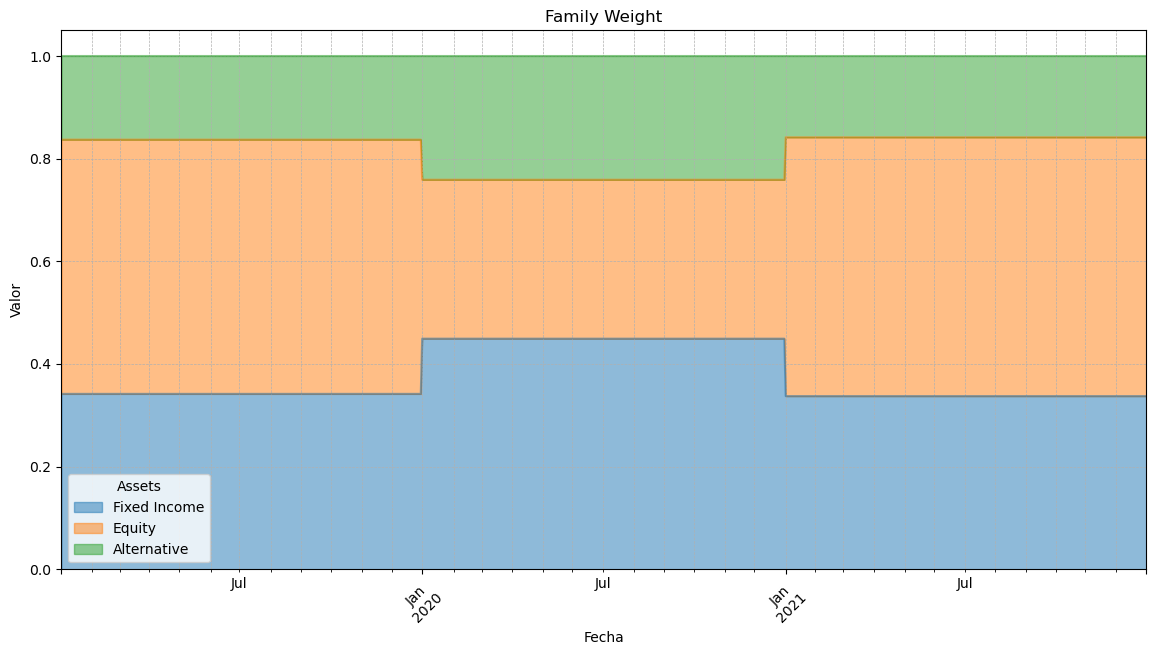

In [36]:
# Graficamos usando plot.area() para los activos seleccionados
df_weights_grouped[family].plot.area(figsize=(14, 7), alpha=0.5)

# Personalizamos el gráfico
plt.title("Family Weight")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar el gráfico con las fechas en el eje x
plt.xticks(rotation=45)  # Rotar las fechas para que se vean mejor
plt.legend(title="Assets")
plt.show()